# Pymaceuticals Inc.
---

### Analysis

#•	The bar graph showed the Drug Regimen Capomulin has a maximum mice number of (249).
#•	The correlation of the mouse weight is an average tumor volume is 40.6 
#•	THE regression analysis displayed the average tumor volume will change when weight of mice change.
 

In [66]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

mouse_metadata_students_complete = pd.merge(mouse_metadata, study_results)


# Display the data table for preview
mouse_metadata_students_complete.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [67]:
# Checking the number of mice.

mice_count = len(mouse_metadata["Mouse ID"].value_counts())
mice_count

249

In [68]:
# Combine the data into a single dataset
mouse_study = pd.merge(study_results,mouse_metadata, on ="Mouse ID", how="left")
mouse_study.head(5)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [69]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
show_duplicates = mouse_study["Mouse ID"][mouse_study.duplicated(["Mouse ID", "Timepoint"])].unique()
show_duplicates

array(['g989'], dtype=object)

In [70]:
#Optional: Get all the data for the duplicate mouse ID.
duplicate_values = mouse_study.loc[mouse_study["Mouse ID"] == 'g989', :]
duplicate_values

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [71]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_study = mouse_study[mouse_study["Mouse ID"].isin(duplicate_values)==False]
clean_mouse_study.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [72]:
###  (should be 248)pracrice cell Checking the number of mice in the clean DataFrame.
clean_number_mice = clean_mouse_study["Mouse ID"].nunique()

clean_number_mice

249

## Summary Statistics

In [73]:

#Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

mean = clean_mouse_study["Tumor Volume (mm3)"].groupby(clean_mouse_study["Drug Regimen"]).mean()
median = clean_mouse_study["Tumor Volume (mm3)"].groupby(clean_mouse_study["Drug Regimen"]).median()
var = clean_mouse_study["Tumor Volume (mm3)"].groupby(clean_mouse_study["Drug Regimen"]).var()
std = clean_mouse_study["Tumor Volume (mm3)"].groupby(clean_mouse_study["Drug Regimen"]).std()
sem= clean_mouse_study["Tumor Volume (mm3)"].groupby(clean_mouse_study["Drug Regimen"]).sem()

summary_stat = pd.DataFrame({"Mean Tumor Volume":mean,
                            "Median Tumor Volume":median,
                            "Tumor Volume Variance":var,
                            "Tumor Volume Std. Dev.":std,
                            "Tumor Volume Std. Err.":sem})

summary_stat







,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [27]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.


summary_agg = clean_mouse_study.groupby(["Drug Regimen"])[["Tumor Volume (mm3)"]].agg(["mean", "median", "var", "std", "sem"])

summary_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0, 0.5, 'Number of Timepoints')

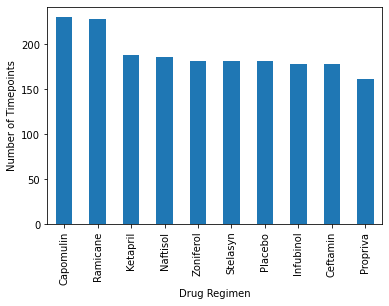

In [74]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
timepoints_per_regimen = mouse_study.groupby("Drug Regimen")["Timepoint"].count()
timepoints_per_regimen = timepoints_per_regimen.sort_values(ascending=False)
#timepoints_per_regimen = timepoints_per_regimen.to_frame()
ax = timepoints_per_regimen.plot.bar(legend=False)
ax.set_xlabel("Drug Regimen")
ax.set_ylabel("Number of Timepoints")




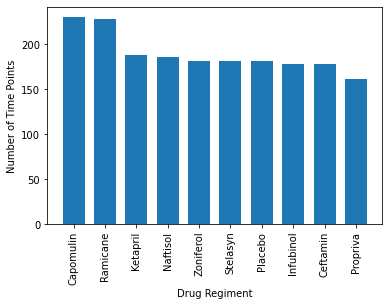

In [75]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
timepoints_per_regimen = mouse_study.groupby("Drug Regimen")["Timepoint"].count()
timepoints_per_regimen = timepoints_per_regimen.sort_values(ascending=False)
plt.bar(timepoints_per_regimen.index, timepoints_per_regimen.values, width=0.7)
plt.xticks(rotation=90)
plt.xlabel("Drug Regiment")
plt.ylabel("Number of Time Points")
plt.show()


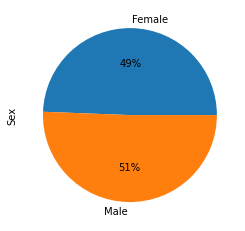

In [107]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
female_vs_male = mouse_study.groupby("Sex")["Sex"].count()
ax = female_vs_male.plot.pie(autopct='%1.0f%%')




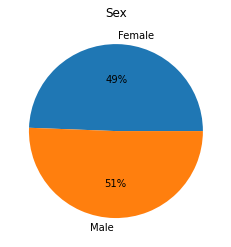

In [106]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

female_vs_male = mouse_study.groupby("Sex")["Sex"].count()
plt.pie(female_vs_male, autopct='%1.0f%%', labels=["Female", "Male"])
plt.title("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [78]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

Capomulin_df = clean_mouse_study.loc[clean_mouse_study["Drug Regimen"] == "Capomulin",:]
Ramicane_df = clean_mouse_study.loc[clean_mouse_study["Drug Regimen"] == "Ramicane", :]
Infubinol_df = clean_mouse_study.loc[clean_mouse_study["Drug Regimen"] == "Infubinol", :]
Ceftamin_df = clean_mouse_study.loc[clean_mouse_study["Drug Regimen"] == "Ceftamin", :]













In [79]:
# Start by getting the last (greatest) timepoint for each mouse


Capomulin_last = Capomulin_df.groupby('Mouse ID').max()['Timepoint']
Capomulin_vol = pd.DataFrame(Capomulin_last)
Capomulin_merge = pd.merge(Capomulin_vol, clean_mouse_study, on=("Mouse ID","Timepoint"),how="left")
Capomulin_merge.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,45,38.982878,2,Capomulin,Female,9,22
1,b742,45,38.939633,0,Capomulin,Male,7,21
2,f966,20,30.485985,0,Capomulin,Male,16,17
3,g288,45,37.074024,1,Capomulin,Male,3,19
4,g316,45,40.159220,2,Capomulin,Female,22,22


In [80]:
# # Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

Capomulin_tumors = Capomulin_merge["Tumor Volume (mm3)"]

quartiles =Capomulin_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print(f"The lower quartile of Capomulin tumors: {lowerq}")
print(f"The upper quartile of Capomulin tumors: {upperq}")
print(f"The interquartile range of Capomulin tumors: {iqr}")
print(f"The median of Capomulin tumors: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Capomulin tumors: 32.37735684
The upper quartile of Capomulin tumors: 40.1592203
The interquartile range of Capomulin tumors: 7.781863460000004
The median of Capomulin tumors: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [81]:
Ramicane_last = Ramicane_df.groupby('Mouse ID').max()['Timepoint']
Ramicane_vol = pd.DataFrame(Ramicane_last)
Ramicane_merge = pd.merge(Ramicane_vol, clean_mouse_study, on=("Mouse ID","Timepoint"),how="left")
Ramicane_merge.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a411,45,38.407618,1,Ramicane,Male,3,22
1,a444,45,43.047543,0,Ramicane,Female,10,25
2,a520,45,38.810366,1,Ramicane,Male,13,21
3,a644,45,32.978522,1,Ramicane,Female,7,17
4,c458,30,38.342008,2,Ramicane,Female,23,20


In [82]:

Ramicane_last = Ramicane_df.groupby('Mouse ID').max()['Timepoint']
Ramicane_vol = pd.DataFrame(Ramicane_last)
Ramicane_merge = pd.merge(Ramicane_vol, clean_mouse_study, on=("Mouse ID","Timepoint"),how="left")
Ramicane_merge.head()
Ramicane_merge.to_csv("output.csv")
Ramicane_tumors = Ramicane_merge["Tumor Volume (mm3)"]

quartiles =Ramicane_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print(f"The lower quartile of Ramicane tumors is: {lowerq}")
print(f"The upper quartile of Ramicane tumors is: {upperq}")
print(f"The interquartile range of Ramicane tumors is: {iqr}")
print(f"The median of Ramicane tumors is: {quartiles[0.5]} ")



The lower quartile of Ramicane tumors is: 31.56046955
The upper quartile of Ramicane tumors is: 40.65900627
The interquartile range of Ramicane tumors is: 9.098536719999998
The median of Ramicane tumors is: 36.56165229 


In [83]:
Infubinol_last = Infubinol_df.groupby('Mouse ID').max()['Timepoint']
Infubinol_vol = pd.DataFrame(Infubinol_last)
Infubinol_merge = pd.merge(Infubinol_vol, clean_mouse_study, on=("Mouse ID","Timepoint"),how="left")
Infubinol_merge.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a577,30,57.031862,2,Infubinol,Female,6,25
3,a685,45,66.083066,3,Infubinol,Male,8,30
4,c139,45,72.226731,2,Infubinol,Male,11,28


In [84]:
Ceftamin_last = Ceftamin_df.groupby('Mouse ID').max()['Timepoint']
Ceftamin_vol = pd.DataFrame(Ceftamin_last)
Ceftamin_merge = pd.merge(Ceftamin_vol, clean_mouse_study, on=("Mouse ID","Timepoint"),how="left")
Ceftamin_merge.head()
Ceftamin_merge.to_csv("output.csv")
Ceftamin_tumors = Ceftamin_merge["Tumor Volume (mm3)"]

quartiles =Ramicane_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print(f"The lower quartile of Ceftamin tumors is: {lowerq}")
print(f"The upper quartile of Ceftamin tumors is: {upperq}")
print(f"The interquartile range of Ceftamin tumors is: {iqr}")
print(f"The median of Ceftamin tumors is: {quartiles[0.5]} ")

The lower quartile of Ceftamin tumors is: 31.56046955
The upper quartile of Ceftamin tumors is: 40.65900627
The interquartile range of Ceftamin tumors is: 9.098536719999998
The median of Ceftamin tumors is: 36.56165229 


In [86]:
# Put treatments into a list for for loop (and later for plot labels)

Treatment_List = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
    
# Create empty list to fill with tumor vol data (for plotting)
Empty_List = []


# Calculate the IQR and quantitatively determine if there are any potential outliers.

for drug in Treatment_List:
    drug_df = clean_mouse_study.loc[clean_mouse_study["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    Empty_List.append(drug_df)
    quartiles = drug_df.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    
    print(f"The lower quartile of {drug} tumors is: {lowerq}")
    print(f"The upper quartile of {drug} tumors is: {upperq}")
    print(f"The interquartile range of {drug} tumors is: {iqr}")
    print(f"The median of {drug} tumors is: {quartiles[0.5]} ")

    

The lower quartile of Capomulin tumors is: 37.685932865
The upper quartile of Capomulin tumors is: 45.0
The interquartile range of Capomulin tumors is: 7.314067135000002
The median of Capomulin tumors is: 41.557808879999996 
The lower quartile of Ramicane tumors is: 36.67463458499999
The upper quartile of Ramicane tumors is: 45.0
The interquartile range of Ramicane tumors is: 8.325365415000007
The median of Ramicane tumors is: 40.67323554 
The lower quartile of Infubinol tumors is: 47.3123533
The upper quartile of Infubinol tumors is: 57.314443967500004
The interquartile range of Infubinol tumors is: 10.002090667500006
The median of Infubinol tumors is: 51.82058438 
The lower quartile of Ceftamin tumors is: 47.208427112500004
The upper quartile of Ceftamin tumors is: 56.801437570000004
The interquartile range of Ceftamin tumors is: 9.5930104575
The median of Ceftamin tumors is: 51.77615728000001 


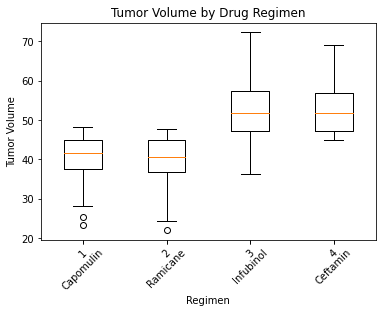

In [94]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


    
fig = plt.figure()
plt.xlabel("Regimen")
plt.xticks([1,2,3,4], Treatment_List, rotation=45)
plt.ylabel("Tumor Volume")
plt.title("Tumor Volume by Drug Regimen")
plt.boxplot(Empty_List)
plt.show()


    

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

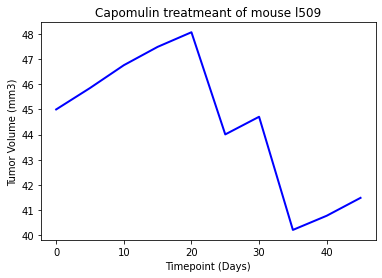

In [110]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

forline_df = Capomulin_df.loc[Capomulin_df["Mouse ID"] == "l509",:]
forline_df.head()
x_axis = forline_df["Timepoint"]
tumsiz = forline_df["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots()
plt.title('Capomulin treatmeant of mouse l509')
plt.plot(x_axis, tumsiz,linewidth=2,color="blue", label="Fahreneit")
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

Text(0, 0.5, 'Averag Tumor Volume (mm3)')

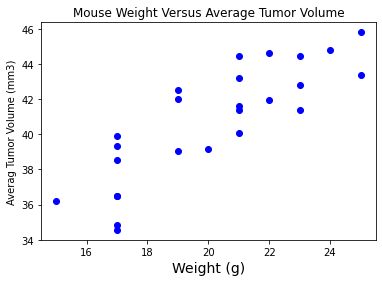

In [111]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

fig1, ax1 = plt.subplots()
avg_capm_vol =Capomulin_df.groupby(['Mouse ID']).mean()

marker_size=15
plt.scatter(avg_capm_vol['Weight (g)'],avg_capm_vol['Tumor Volume (mm3)'], color="blue")
plt.title('Mouse Weight Versus Average Tumor Volume')
plt.xlabel('Weight (g)',fontsize =14)
plt.ylabel('Averag Tumor Volume (mm3)')

## Correlation and Regression

In [112]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

correlation = st.pearsonr(avg_capm_vol['Weight (g)'],avg_capm_vol['Tumor Volume (mm3)'])
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")


The correlation between mouse weight and the average tumor volume is 0.84


The r-squared is: 0.709


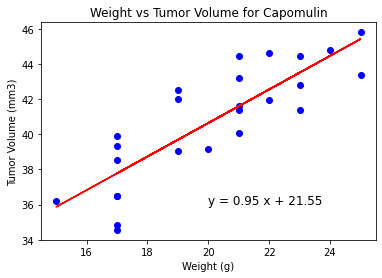

In [109]:
(slope, intercept,rvalue, pvalue, stderr) = st.linregress(avg_capm_vol["Weight (g)"],avg_capm_vol["Tumor Volume (mm3)"])
regress_values=avg_capm_vol["Weight (g)"]* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(avg_capm_vol["Weight (g)"],avg_capm_vol["Tumor Volume (mm3)"],color='b')
plt.plot(avg_capm_vol["Weight (g)"], regress_values, color='red')
plt.annotate(line_eq,(20,36), fontsize=12)
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Weight vs Tumor Volume for Capomulin")
print(f"The r-squared is: {round(rvalue**2,3)}")
plt.show()